In [101]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


**EDA**

In [102]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('./data/hypothyroid.csv')
df.head()

print('The dataset contains', df.shape[0], 'entries')
print('Each entry has', df.shape[1], 'attributes')
print(df.dtypes)
print(df['binaryClass'].describe())
print(df['binaryClass'].value_counts().head(10))

The dataset contains 3622 entries
Each entry has 28 attributes
age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI         

In [103]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3621.000000,3270.000000,2877.000000,3405.000000,3255.000000,3257.000000
mean,51.840099,5.004784,2.010650,108.204347,0.995516,110.272981
std,20.094311,23.603386,0.828999,35.604462,0.195374,32.864116
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.490000,1.600000,87.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.300000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


**Dropping Unnecessary Information**

*Dropping columns*

These columns are irrelevent to the Model

In [104]:
df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)


In [105]:
print('The dataset contains', df.shape[0], 'entries')
print('Each entry has', df.shape[1], 'attributes')
print(df.dtypes)
print(df['binaryClass'].describe())
print(df['binaryClass'].value_counts().head(10))

The dataset contains 3622 entries
Each entry has 15 attributes
age                float64
sex                 object
sick                object
pregnant            object
thyroid surgery     object
I131 treatment      object
lithium             object
goitre              object
tumor               object
TSH                float64
T3                 float64
TT4                float64
T4U                float64
FTI                float64
binaryClass         object
dtype: object
count     3622
unique       2
top          P
freq      3342
Name: binaryClass, dtype: object
binaryClass
P    3342
N     280
Name: count, dtype: int64


*Handling Outliers in Age*

In [106]:
print(df['age'].describe())

count    3621.000000
mean       51.840099
std        20.094311
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64


In [107]:
print(df[(df['age'] < 1) | (df['age'] > 100)])

        age sex sick pregnant thyroid surgery I131 treatment lithium goitre  \
1313  455.0   F    f        f               f              f       f      f   

     tumor  TSH   T3    TT4   T4U    FTI binaryClass  
1313     f  1.1  2.0  118.0  1.13  104.0           P  


In [108]:
df_age_outlier = df[(df['age'] < 1) | (df['age'] > 100)]

df.drop(df_age_outlier.index, inplace=True)

In [109]:
print(df['age'].describe())

count    3620.000000
mean       51.728729
std        18.946454
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max        94.000000
Name: age, dtype: float64


In [110]:
print('The dataset contains', df.shape[0], 'entries')
print('Each entry has', df.shape[1], 'attributes')
print(df.dtypes)
print(df['binaryClass'].describe())
print(df['binaryClass'].value_counts().head(10))

The dataset contains 3621 entries
Each entry has 15 attributes
age                float64
sex                 object
sick                object
pregnant            object
thyroid surgery     object
I131 treatment      object
lithium             object
goitre              object
tumor               object
TSH                float64
T3                 float64
TT4                float64
T4U                float64
FTI                float64
binaryClass         object
dtype: object
count     3621
unique       2
top          P
freq      3341
Name: binaryClass, dtype: object
binaryClass
P    3341
N     280
Name: count, dtype: int64


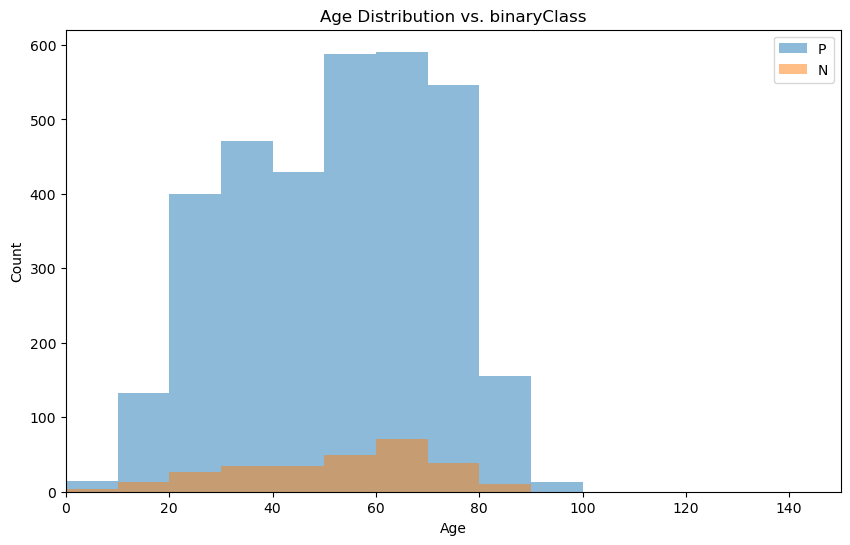

In [111]:
import matplotlib.pyplot as plt

categories = df['binaryClass'].unique()

plt.figure(figsize=(10, 6))
for c in categories:
    plt.hist(df[df['binaryClass'] == c]['age'], alpha=0.5, label=c, range=(0, 150), bins=15)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age Distribution vs. binaryClass')
plt.xlim(0, 150)
plt.show()


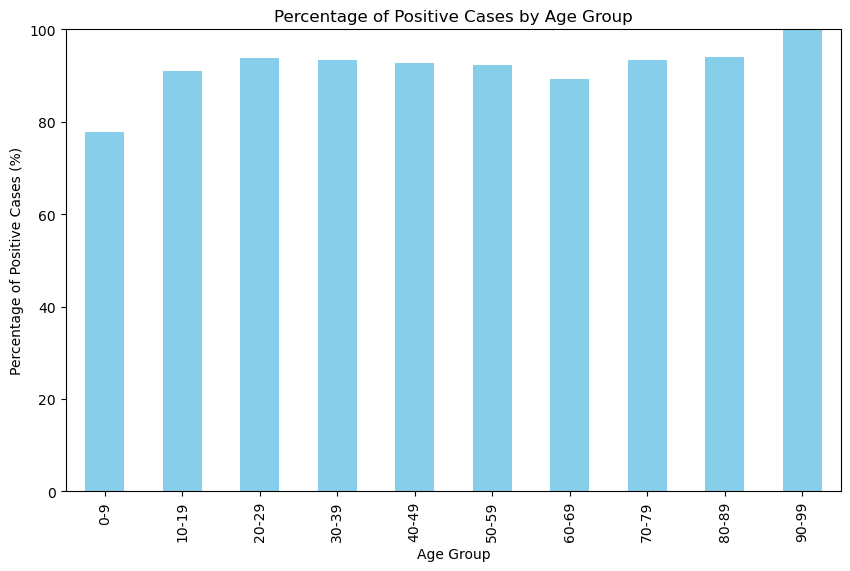

In [112]:
import matplotlib.pyplot as plt

df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), right=False, labels=[
    '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'
])
age_group_totals = df['age_group'].value_counts()
age_group_positives = df[df['binaryClass'] == 'P']['age_group'].value_counts()
positive_percentage = (age_group_positives / age_group_totals) * 100

plt.figure(figsize=(10, 6))
positive_percentage.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Positive Cases (%)')
plt.title('Percentage of Positive Cases by Age Group')
plt.ylim(0, 100)
plt.show()


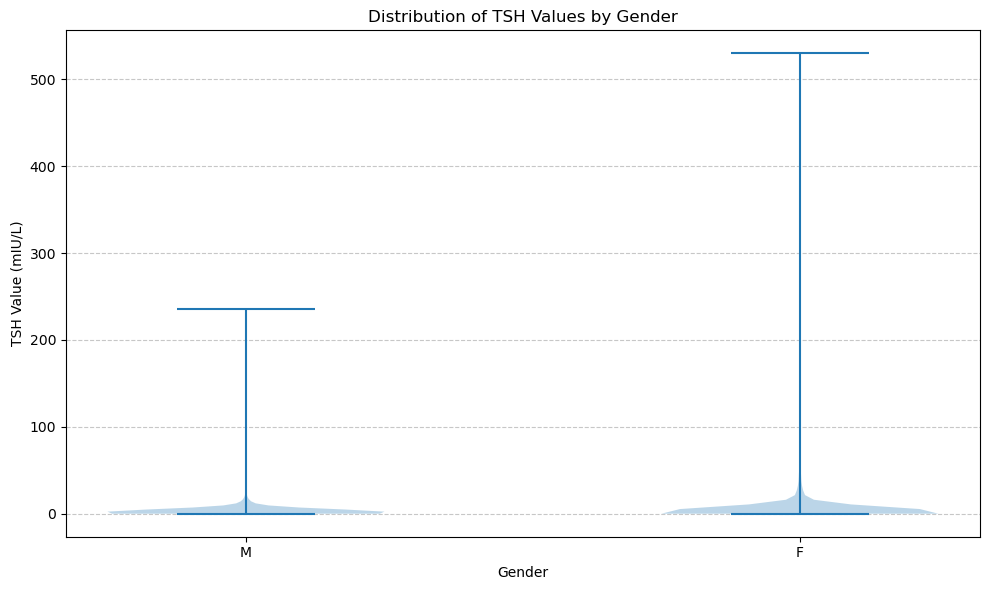

In [113]:
import matplotlib.pyplot as plt

male_tsh = df[df['sex'] == 'M']['TSH'].astype(float).dropna()
female_tsh = df[df['sex'] == 'F']['TSH'].astype(float).dropna()

plt.figure(figsize=(10, 6))
plt.violinplot([male_tsh, female_tsh], showmedians=False, showextrema=True)

plt.xticks([1, 2], ['M', 'F'])
plt.title('Distribution of TSH Values by Gender')
plt.ylabel('TSH Value (mIU/L)')
plt.xlabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


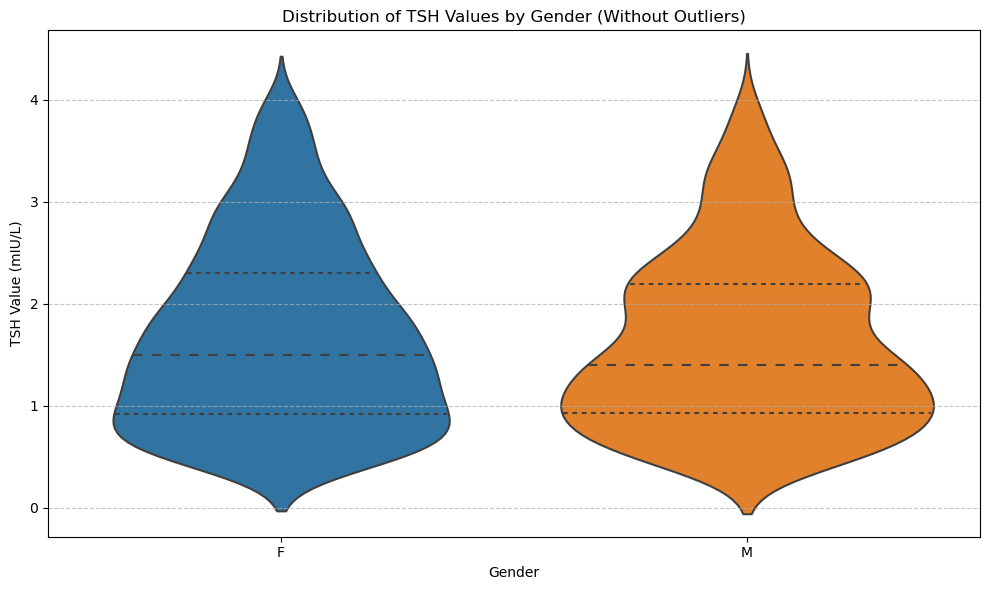

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns


def remove_outliers_custom_range(df, column, lower_bound, upper_bound):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

lower_bound_custom = 0.4
upper_bound_custom = 4.0

df_no_outliers = remove_outliers_custom_range(df, 'TSH', lower_bound_custom, upper_bound_custom)

plt.figure(figsize=(10, 6))

sns.violinplot(x=df_no_outliers['sex'], y=df_no_outliers['TSH'].astype(float), inner='quartile')

plt.title('Distribution of TSH Values by Gender (Without Outliers)')
plt.ylabel('TSH Value (mIU/L)')
plt.xlabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

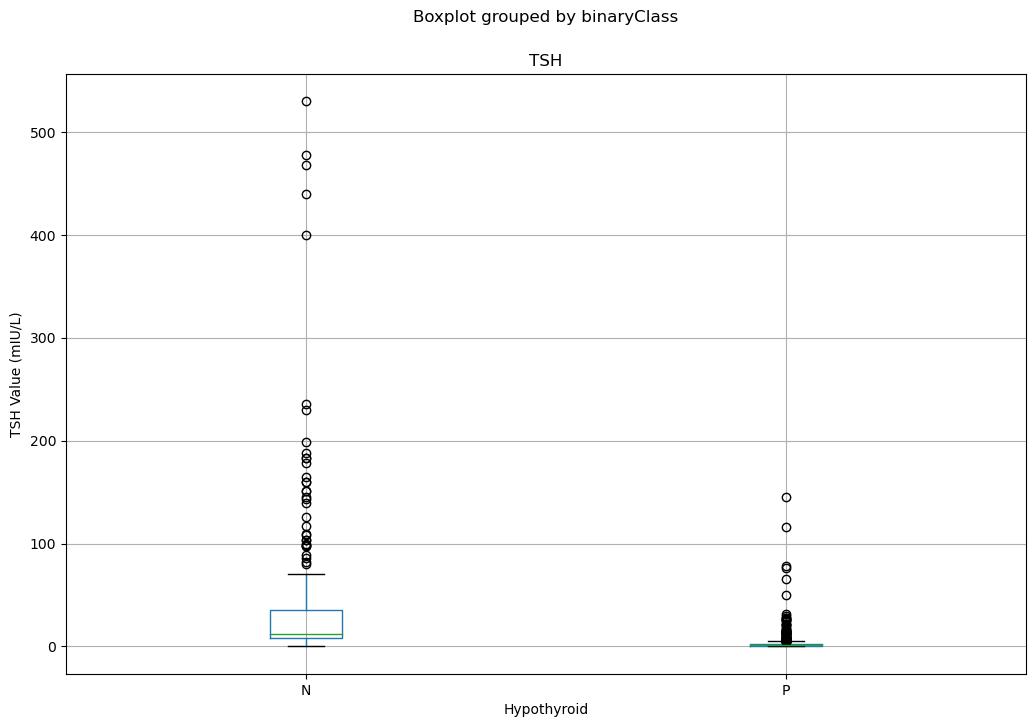

In [115]:
plt.figure(figsize=(12, 8)) 

df[['TSH','binaryClass']].boxplot(by='binaryClass', figsize=(12, 8))

plt.ylabel('TSH Value (mIU/L)')
plt.xlabel('Hypothyroid')

plt.show()


binaryClass
P    3341
N     280
Name: count, dtype: int64
count    3269.000000
mean        5.005979
std        23.606898
min         0.005000
25%         0.490000
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64


<Figure size 1200x800 with 0 Axes>

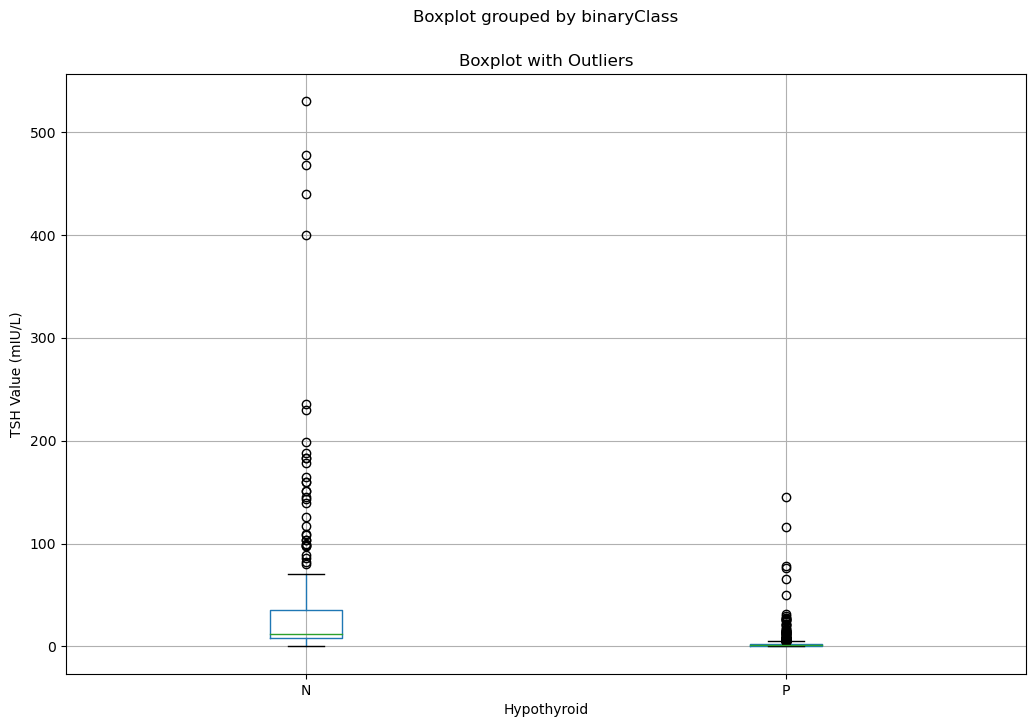

<Figure size 1200x800 with 0 Axes>

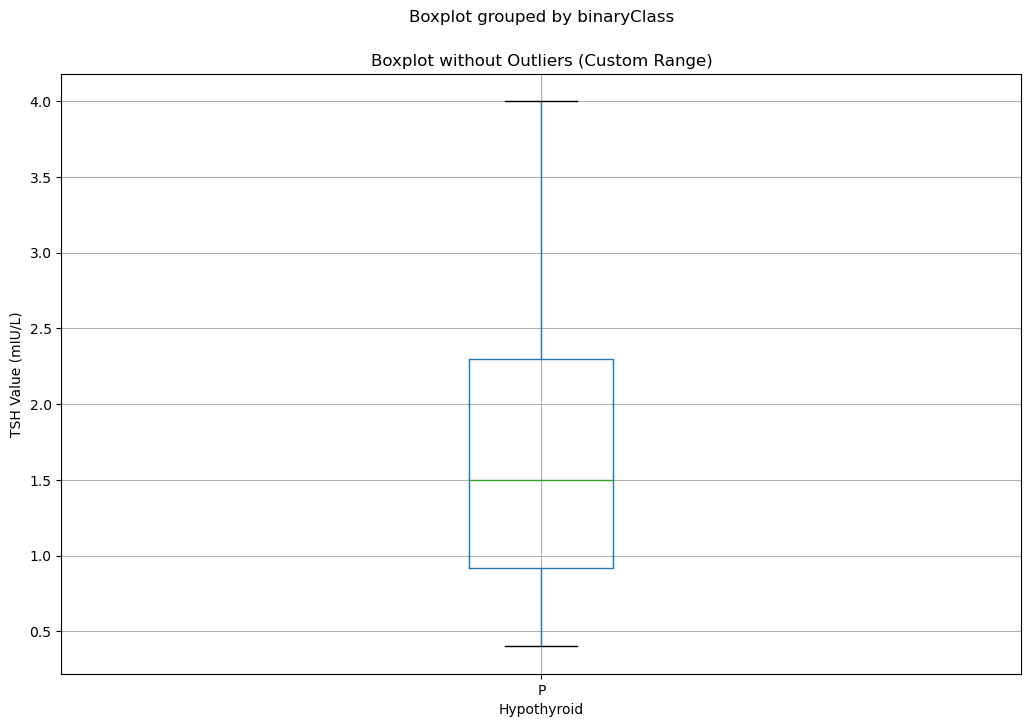

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


print(df['binaryClass'].value_counts())

print(df['TSH'].describe())

plt.figure(figsize=(12, 8))
df[['TSH', 'binaryClass']].boxplot(by='binaryClass', figsize=(12, 8))
plt.ylabel('TSH Value (mIU/L)')
plt.xlabel('Hypothyroid')
plt.title('Boxplot with Outliers')
plt.show()

def remove_outliers_custom_range(df, column, lower_bound, upper_bound):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

lower_bound_custom = 0.4
upper_bound_custom = 4.0

df_no_outliers_custom_range = df.groupby('binaryClass', as_index=False).apply(
    lambda x: remove_outliers_custom_range(x, 'TSH', lower_bound_custom, upper_bound_custom)
).reset_index(drop=True)

plt.figure(figsize=(12, 8))
df_no_outliers_custom_range[['TSH', 'binaryClass']].boxplot(by='binaryClass', figsize=(12, 8))
plt.ylabel('TSH Value (mIU/L)')
plt.xlabel('Hypothyroid')
plt.title('Boxplot without Outliers (Custom Range)')
plt.show()


**Handling Missing Data**

In [117]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (3621, 16)
fraction of missing values in features:
age          0.000276
TSH          0.097211
T3           0.205744
TT4          0.059928
T4U          0.101353
FTI          0.100801
age_group    0.000276
dtype: float64
data types of the features with missing values:
age           float64
TSH           float64
T3            float64
TT4           float64
T4U           float64
FTI           float64
age_group    category
dtype: object
fraction of points with missing values: 0.2703673018503176


*For Continuous Features*

Since all of the missing values exist in Continuous Featues, we do not need to use OneHotEncoder to handle missing values instead we use XGBoost

### Splitting

In [118]:
from sklearn.model_selection import train_test_split

X = df.drop('binaryClass', axis=1)
y = df['binaryClass']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_size = X_train.shape[0]
val_size = X_val.shape[0]
test_size = X_test.shape[0]

train_size, val_size, test_size


(2172, 724, 725)

### Preprocessing - XGBoost

We are only preprocessing the Categorical features as the continuous features are directly done by XGBoost

In [119]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols_mod)
    ])

X_train_cat_preprocessed = cat_preprocessor.fit_transform(X_train_mod)
X_val_cat_preprocessed = cat_preprocessor.transform(X_val_mod)
X_test_cat_preprocessed = cat_preprocessor.transform(X_test_mod)

X_train_cat_preprocessed.shape, X_val_cat_preprocessed.shape, X_test_cat_preprocessed.shape


((2172, 8), (724, 8), (725, 8))

### XGBoost

In [120]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_mod)
y_val_encoded = label_encoder.transform(y_val_mod)
y_test_encoded = label_encoder.transform(y_test_mod)

xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    n_estimators=100,  
    max_depth=3,       
    learning_rate=0.1, 
    verbosity=1        
)

xgb_clf.fit(X_train_cat_preprocessed, y_train_encoded)

y_val_pred = xgb_clf.predict(X_val_cat_preprocessed)

accuracy = accuracy_score(y_val_encoded, y_val_pred)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))


Validation Accuracy: 92.54%


`use_label_encoder` is deprecated in 1.7.0.


#### Hyper Parameter Tuning for XGBoost

In [135]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    param_grid=xgb_param_grid, 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

xgb_grid_search.fit(X_train_full_preprocessed, y_train_encoded)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)


Fitting 3 folds for each of 4096 candidates, totalling 12288 fits


`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}

In [140]:
optimized_xgb = xgb.XGBClassifier(
    colsample_bytree=1.0,
    gamma=0.1,
    learning_rate=0.2,
    max_depth=4,
    n_estimators=100,
    subsample=0.7,
    use_label_encoder=False,
    eval_metric='logloss'
)

optimized_xgb.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_optimized_xgb = optimized_xgb.predict(X_val_full_preprocessed)
accuracy_val_optimized_xgb = accuracy_score(y_val_encoded, y_val_pred_optimized_xgb)
print("Optimized XGBoost Validation Accuracy: {:.2f}%".format(accuracy_val_optimized_xgb * 100))


`use_label_encoder` is deprecated in 1.7.0.


Optimized XGBoost Validation Accuracy: 95.44%


In [141]:
y_test_pred_optimized_xgb = optimized_xgb.predict(X_test_full_preprocessed)
accuracy_test_optimized_xgb = accuracy_score(y_test_encoded, y_test_pred_optimized_xgb)
print("Optimized XGBoost Test Accuracy: {:.2f}%".format(accuracy_test_optimized_xgb * 100))

Optimized XGBoost Test Accuracy: 95.59%


### Preprocessing - For Other Models

Multivariate imputation followed by min-max scaling to the continuous features and then combines them with the preprocessed categorical features.

In [124]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline


continuous_preprocessor = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),  
    ('scaler', MinMaxScaler())                                   
])

X_train_continuous_preprocessed = continuous_preprocessor.fit_transform(X_train_mod[continuous_cols_mod])
X_val_continuous_preprocessed = continuous_preprocessor.transform(X_val_mod[continuous_cols_mod])
X_test_continuous_preprocessed = continuous_preprocessor.transform(X_test_mod[continuous_cols_mod])

if hasattr(X_train_cat_preprocessed, "toarray"):
    X_train_cat_preprocessed = X_train_cat_preprocessed.toarray()
if hasattr(X_val_cat_preprocessed, "toarray"):
    X_val_cat_preprocessed = X_val_cat_preprocessed.toarray()
if hasattr(X_test_cat_preprocessed, "toarray"):
    X_test_cat_preprocessed = X_test_cat_preprocessed.toarray()

X_train_full_preprocessed = np.hstack((X_train_cat_preprocessed, X_train_continuous_preprocessed))
X_val_full_preprocessed = np.hstack((X_val_cat_preprocessed, X_val_continuous_preprocessed))
X_test_full_preprocessed = np.hstack((X_test_cat_preprocessed, X_test_continuous_preprocessed))

X_train_full_preprocessed.shape, X_val_full_preprocessed.shape, X_test_full_preprocessed.shape



[IterativeImputer] Early stopping criterion not reached.


((2172, 14), (724, 14), (725, 14))

### Other ML Algorightms
### Logestic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

log_reg.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_log_reg = log_reg.predict(X_val_full_preprocessed)

accuracy_log_reg = accuracy_score(y_val_encoded, y_val_pred_log_reg)
print("Logistic Regression Validation Accuracy: {:.2f}%".format(accuracy_log_reg * 100))


Logistic Regression Validation Accuracy: 93.23%


#### Hyperparameter Tuning

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet']
}

log_reg_grid_search = GridSearchCV(
    LogisticRegression(), 
    log_reg_param_grid, 
    cv=3,
    verbose=2,
    n_jobs=-1
)

log_reg_grid_search.fit(X_train_full_preprocessed, y_train_encoded)

print("Best parameters for Logistic Regression:", log_reg_grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ........................C=0.001, penalty=elasticnet; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01

/Users/subash/anaconda3/envs/data1030_inter/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/subash/anaconda3/envs/data1030_inter/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

optimized_log_reg = LogisticRegression(C=100, penalty='l2')

optimized_log_reg.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_optimized_log_reg = optimized_log_reg.predict(X_val_full_preprocessed)

optimized_accuracy_log_reg = accuracy_score(y_val_encoded, y_val_pred_optimized_log_reg)
print("Optimized Logistic Regression Validation Accuracy: {:.2f}%".format(optimized_accuracy_log_reg * 100))


Optimized Logistic Regression Validation Accuracy: 94.20%


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [134]:
y_test_pred_log_reg = optimized_log_reg.predict(X_test_full_preprocessed)
accuracy_test_log_reg = accuracy_score(y_test_encoded, y_test_pred_log_reg)
print("Logistic Regression Test Accuracy: {:.2f}%".format(accuracy_test_log_reg * 100))

Logistic Regression Test Accuracy: 93.66%


### Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0)

rf_clf.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_rf = rf_clf.predict(X_val_full_preprocessed)
accuracy_val_rf = accuracy_score(y_val_encoded, y_val_pred_rf)
print("Random Forest Validation Accuracy: {:.2f}%".format(accuracy_val_rf * 100))

y_test_pred_rf = rf_clf.predict(X_test_full_preprocessed)
accuracy_test_rf = accuracy_score(y_test_encoded, y_test_pred_rf)
print("Random Forest Test Accuracy: {:.2f}%".format(accuracy_test_rf * 100))


Random Forest Validation Accuracy: 95.58%
Random Forest Test Accuracy: 95.03%


#### Hyperparameter Tuning - Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
import numpy as np

nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []

for i in range(nr_states):
    print('Random State', i + 1)

    param_grid = {
        'max_depth': [1, 3, 10, 30, 100],
        'max_features': [0.25, 0.5, 0.75, 1.0]
    }

    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []

    for p, params in enumerate(ParameterGrid(param_grid)):
        print('   Parameters:', params)
        clf = RandomForestClassifier(**params, random_state=42*i, n_jobs=-1)
        clf.fit(X_train_full_preprocessed, y_train_encoded)

        models.append(clf)
        y_train_pred = clf.predict(X_train_full_preprocessed)
        y_val_pred = clf.predict(X_val_full_preprocessed)

        train_score[p] = accuracy_score(y_train_encoded, y_train_pred)
        val_score[p] = accuracy_score(y_val_encoded, y_val_pred)
        print('   Train Score:', train_score[p], 'Validation Score:', val_score[p])

    best_params = ParameterGrid(param_grid)[np.argmax(val_score)]
    print('Best Model Parameters:', best_params)
    print('Corresponding Validation Score:', np.max(val_score))

    final_models.append(models[np.argmax(val_score)])
    y_test_pred = final_models[-1].predict(X_test_full_preprocessed)
    test_scores[i] = accuracy_score(y_test_encoded, y_test_pred)
    print('Test Score:', test_scores[i])


Random State 1
   Parameters: {'max_depth': 1, 'max_features': 0.25}
   Train Score: 0.9277163904235728 Validation Score: 0.925414364640884
   Parameters: {'max_depth': 1, 'max_features': 0.5}
   Train Score: 0.9525782688766115 Validation Score: 0.93646408839779
   Parameters: {'max_depth': 1, 'max_features': 0.75}
   Train Score: 0.9544198895027625 Validation Score: 0.93646408839779
   Parameters: {'max_depth': 1, 'max_features': 1.0}
   Train Score: 0.9521178637200737 Validation Score: 0.9530386740331491
   Parameters: {'max_depth': 3, 'max_features': 0.25}
   Train Score: 0.9539594843462247 Validation Score: 0.9378453038674033
   Parameters: {'max_depth': 3, 'max_features': 0.5}
   Train Score: 0.9590239410681399 Validation Score: 0.9337016574585635
   Parameters: {'max_depth': 3, 'max_features': 0.75}
   Train Score: 0.962707182320442 Validation Score: 0.9488950276243094
   Parameters: {'max_depth': 3, 'max_features': 1.0}
   Train Score: 0.9682320441988951 Validation Score: 0.9544

In [175]:
# # Random Forest best models' results
# best_params_scores = [
#     {'max_features': 0.5, 'max_depth': 30, 'val_score': 0.9571823204419889, 'test_score': 0.9613793103448276},
#     {'max_features': 1.0, 'max_depth': 10, 'val_score': 0.9599447513812155, 'test_score': 0.96},
#     {'max_features': 1.0, 'max_depth': 10, 'val_score': 0.9585635359116023, 'test_score': 0.9627586206896551}
# ]

# best_rf_result = max(best_params_scores, key=lambda x: x['test_score'])

# accuracy_test_optimized_rf = best_rf_result['test_score']

# print("Best Random Forest Model:")
# print(f"   Best Model Parameters: {best_rf_result['max_features']} for max_features, {best_rf_result['max_depth']} for max_depth")
# print(f"   Corresponding Validation Score: {best_rf_result['val_score'] * 100:.2f}%")
# print(f"   Test Score: {accuracy_test_optimized_rf * 100:.2f}%\n")


In [177]:
best_model_index = np.argmax(test_scores)

best_rf_model = final_models[best_model_index]

accuracy_test_optimized_rf = test_scores[best_model_index]

print(f"Best Random Forest Model (Random State {best_model_index + 1}):")
print(f"   Test Score: {test_scores[best_model_index] * 100:.2f}%")



Best Random Forest Model (Random State 3):
   Test Score: 96.41%


### KNN

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_knn = knn_clf.predict(X_val_full_preprocessed)
accuracy_val_knn = accuracy_score(y_val_encoded, y_val_pred_knn)
print("KNN Validation Accuracy: {:.2f}%".format(accuracy_val_knn * 100))

y_test_pred_knn = knn_clf.predict(X_test_full_preprocessed)
accuracy_test_knn = accuracy_score(y_test_encoded, y_test_pred_knn)
print("KNN Test Accuracy: {:.2f}%".format(accuracy_test_knn * 100))


KNN Validation Accuracy: 93.51%
KNN Test Accuracy: 92.55%


#### Hyperparameter Tuning - KNN

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=3,
    verbose=2,
    n_jobs=-1
)

knn_grid_search.fit(X_train_full_preprocessed, y_train_encoded)

print("Best parameters for KNN:", knn_grid_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, wei

In [164]:
optimized_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

optimized_knn.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_optimized_knn = optimized_knn.predict(X_val_full_preprocessed)
accuracy_val_optimized_knn = accuracy_score(y_val_encoded, y_val_pred_optimized_knn)
print("Optimized KNN Validation Accuracy: {:.2f}%".format(accuracy_val_optimized_knn * 100))

y_test_pred_optimized_knn = optimized_knn.predict(X_test_full_preprocessed)
accuracy_test_optimized_knn = accuracy_score(y_test_encoded, y_test_pred_optimized_knn)
print("Optimized KNN Test Accuracy: {:.2f}%".format(accuracy_test_optimized_knn * 100))


Optimized KNN Validation Accuracy: 93.51%
Optimized KNN Test Accuracy: 92.55%


### SVM

In [148]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel='rbf', random_state=0)

svm_clf.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_svm = svm_clf.predict(X_val_full_preprocessed)
accuracy_val_svm = accuracy_score(y_val_encoded, y_val_pred_svm)
print("SVM Validation Accuracy: {:.2f}%".format(accuracy_val_svm * 100))

y_test_pred_svm = svm_clf.predict(X_test_full_preprocessed)
accuracy_test_svm = accuracy_score(y_test_encoded, y_test_pred_svm)
print("SVM Test Accuracy: {:.2f}%".format(accuracy_test_svm * 100))


SVM Validation Accuracy: 93.23%
SVM Test Accuracy: 91.86%


#### Hyperparameter Tuning - SVM

In [149]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
}

svm_grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=0),
    param_grid_svm,
    cv=3,
    verbose=2,
    n_jobs=-1
)

svm_grid_search.fit(X_train_full_preprocessed, y_train_encoded)

print("Best parameters for SVM:", svm_grid_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=

In [166]:
optimized_svm = SVC(kernel='rbf', C=100, gamma=1, random_state=0)

optimized_svm.fit(X_train_full_preprocessed, y_train_encoded)

y_val_pred_optimized_svm = optimized_svm.predict(X_val_full_preprocessed)
accuracy_val_optimized_svm = accuracy_score(y_val_encoded, y_val_pred_optimized_svm)
print("Optimized SVM Validation Accuracy: {:.2f}%".format(accuracy_val_optimized_svm * 100))

y_test_pred_optimized_svm = optimized_svm.predict(X_test_full_preprocessed)
accuracy_test_optimized_svm = accuracy_score(y_test_encoded, y_test_pred_optimized_svm)
print("Optimized SVM Test Accuracy: {:.2f}%".format(accuracy_test_optimized_svm * 100))


Optimized SVM Validation Accuracy: 94.06%
Optimized SVM Test Accuracy: 94.34%


### Best ML Algorithm

#### Establishing a Baseline

In [154]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_full_preprocessed, y_train_encoded)

y_test_pred_dummy = dummy_clf.predict(X_test_full_preprocessed)
baseline_accuracy = accuracy_score(y_test_encoded, y_test_pred_dummy)
print("Baseline Test Accuracy: {:.2f}%".format(baseline_accuracy * 100))


Baseline Test Accuracy: 90.48%


In [178]:
model_performance_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'SVM', 'Baseline'],
    'Test Accuracy': [
        accuracy_test_optimized_rf , 
        accuracy_test_optimized_xgb ,
        accuracy_test_log_reg,
        accuracy_test_optimized_knn,
        accuracy_test_optimized_svm,
        baseline_accuracy
    ]
})

print(model_performance_comparison)


                 Model  Test Accuracy
0        Random Forest       0.964138
1              XGBoost       0.955900
2  Logistic Regression       0.936552
3                  KNN       0.925517
4                  SVM       0.943448
5             Baseline       0.904828


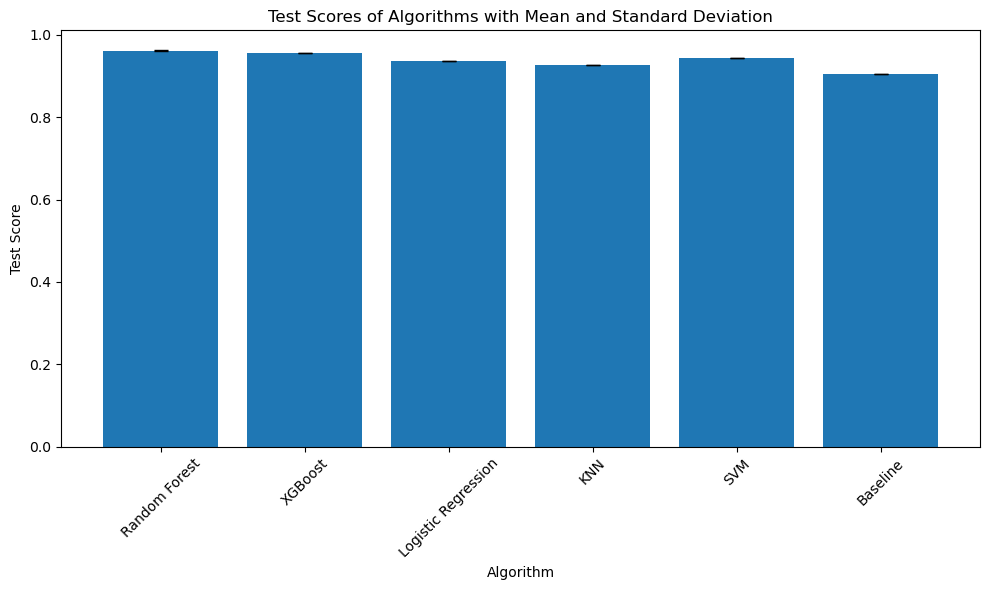

In [215]:
import numpy as np
import matplotlib.pyplot as plt

test_scores_rf = [0.9613793103448276, 0.96, 0.9627586206896551] 
test_scores_xgb = [0.9559]
test_scores_log_reg = [0.936552] 
test_scores_knn = [0.925517] 
test_scores_svm = [0.943448] 
test_scores_dummy = [0.904828]

means = [np.mean(scores) for scores in
         [test_scores_rf, test_scores_xgb, test_scores_log_reg, test_scores_knn, test_scores_svm, test_scores_dummy]]
std_devs = [np.std(scores) for scores in
            [test_scores_rf, test_scores_xgb, test_scores_log_reg, test_scores_knn, test_scores_svm, test_scores_dummy]]

algorithms = ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'SVM', 'Baseline']

plt.figure(figsize=(10, 6))
plt.bar(algorithms, means, yerr=std_devs, capsize=5)
plt.xlabel('Algorithm')
plt.ylabel('Test Score')
plt.title('Test Scores of Algorithms with Mean and Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Evaluation Metrics

#### Confusion Matrix and Recall

In [179]:
from sklearn.metrics import confusion_matrix, recall_score
y_test_pred_rf = best_rf_model.predict(X_test_full_preprocessed)
conf_matrix_rf = confusion_matrix(y_test_encoded, y_test_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)
recall_rf = recall_score(y_test_encoded, y_test_pred_rf)
print("Recall for Random Forest: {:.2f}".format(recall_rf))


Confusion Matrix for Random Forest:
 [[ 51  18]
 [  8 648]]
Recall for Random Forest: 0.99


F1 Score for Random Forest: 0.98


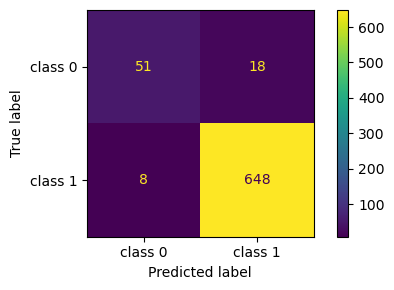

<Figure size 640x480 with 0 Axes>

In [204]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

f1_score_rf = f1_score(y_test_encoded, y_test_pred_rf)
print(f"F1 Score for Random Forest: {f1_score_rf:.2f}")

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_encoded, y_test_pred_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax)
plt.tight_layout()

plt.show()



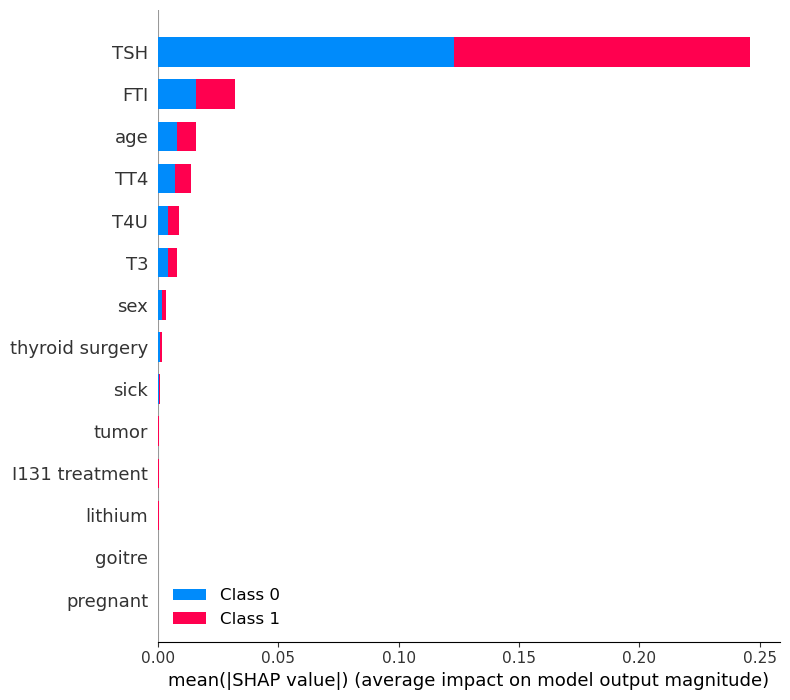

<Figure size 640x480 with 0 Axes>

In [206]:
import shap

featureNames = ['sex', 'sick', 'pregnant', 'thyroid surgery',
                 'I131 treatment', 'lithium', 'goitre',
                 'tumor', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(pd.DataFrame(X_test_full_preprocessed, columns=featureNames))

shap.summary_plot(shap_values, pd.DataFrame(X_test_full_preprocessed, columns=featureNames), plot_type="bar")


In [217]:
from sklearn.metrics import fbeta_score


beta = 2 
fbeta_score_xgb = fbeta_score(y_test_encoded, y_test_pred_xgb, beta=beta)

print(f"F-beta Score for XGBoost (with a focus on recall): {fbeta_score_xgb:.2f}")


F-beta Score for XGBoost (with a focus on recall): 0.98
